# 情感分析

商品评论挖掘、电影推荐、股市预测……情感分析大有用武之地。本文帮助你一步步用Python做出自己的情感分析结果，难道你不想试试看？

维基百科上，情感分析的定义是：

文本情感分析（也称为意见挖掘）是指用自然语言处理、文本挖掘以及计算机语言学等方法来识别和提取原素材中的主观信息。

给你一段文本，你就可以用情感分析的自动化方法获得这一段内容里包含的情感色彩是什么。

## 安装SnowNLP包

In [2]:
# 如果没有安装SnowNLP包
# !pip install snownlp

## SnowNLP特征

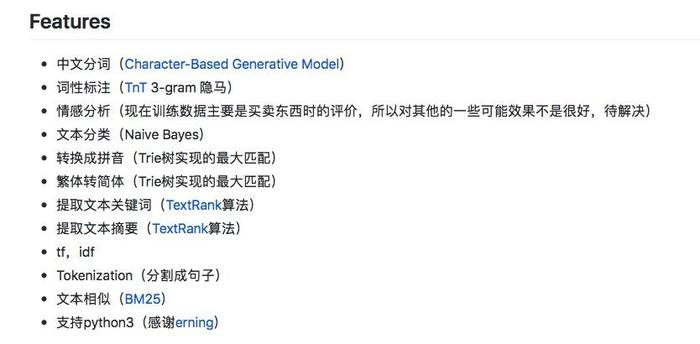

In [3]:
text = u"我今天很快乐。我今天很愤怒。"

注意在引号前面我们加了一个字母u，它很重要。因为它提示Python，“这一段我们输入的文本编码格式是Unicode

In [4]:
from snownlp import SnowNLP
s = SnowNLP(text)

In [4]:
for sentence in s.sentences:
    print(sentence)

我今天很快乐
我今天很愤怒


第一句情感分析结果

In [5]:
s1 = SnowNLP(s.sentences[0])
s1.sentiments

0.971889316039116

第二句情感分析结果

In [6]:
s1 = SnowNLP(s.sentences[1])
s1.sentiments

0.07763913772213482

这里你肯定发现了问题——“愤怒”这个词表达了如此强烈的负面情感，为何得分依然是正的？SnowNLP的情感分析取值，表达的是“这句话代表正面情感的概率”。也就是说，对“我今天很愤怒”一句，SnowNLP认为，它表达正面情感的概率很低很低。

## 其他用法

In [12]:
from snownlp import SnowNLP
# SnowNLP库：
# words：分词
# tags：关键词
# sentiments：情感度
# pinyin：拼音
# keywords(limit)：关键词
# summary：关键句子
# sentences：语序
# tf：tf值
# idf：idf值
s = SnowNLP(u'这个东西真心很赞')
# s.words         # [u'这个', u'东西', u'真心', u'很', u'赞']
print(s.words)
for (k,v) in s.tags:
    print(k,v)
s.tags  # [(u'这个', u'r'), (u'东西', u'n'), (u'真心', u'd')
# , (u'很', u'd'), (u'赞', u'Vg')]
print(s.sentiments)
print(s.pinyin)
# s.sentiments    # 0.9769663402895832 positive的概率
# s.pinyin        # [u'zhe', u'ge', u'dong', u'xi', # u'zhen', u'xin', u'hen',
# u'zan']4
s = SnowNLP(u'「繁體字」「繁體中文」的叫法在臺灣亦很常見。')
# s.han           # u'「繁体字」「繁体中文」的叫法在台湾亦很常见。'
print(s.han)

['这个', '东西', '真心', '很', '赞']
这个 r
东西 n
真心 d
很 d
赞 Vg
0.9769551298267365
['zhe', 'ge', 'dong', 'xi', 'zhen', 'xin', 'hen', 'zan']
「繁体字」「繁体中文」的叫法在台湾亦很常见。


In [19]:
from snownlp import SnowNLP
text = u'''
自然语言处理是计算机科学领域与人工智能领域中的一个重要方向。
它研究能实现人与计算机之间用自然语言进行有效通信的各种理论和方法。
自然语言处理是一门融语言学、计算机科学、数学于一体的科学。
因此，这一领域的研究将涉及自然语言，即人们日常使用的语言，
所以它与语言学的研究有着密切的联系，但又有重要的区别。
自然语言处理并不是一般地研究自然语言，
而在于研制能有效地实现自然语言通信的计算机系统，
特别是其中的软件系统。因而它是计算机科学的一部分。
'''

text = u'''
19日，我省召开中央环保督察“回头看”专题调度会议，学习贯彻习近平生态文明思想，传达落实省委省政府主要领导同志对整改工作的部署要求，总结分析“回头看”以来各地工作开展的情况，就中央环境保护督察组下沉发现问题、群众来信来访反映问题整改工作进行安排部署，要求各设区市和省级各相关部门进一步统一思想认识，又严又细又实地抓好督察整改工作。副省长缪瑞林出席会议并讲话。各设区市分管市长、省协调联络组组长、副组长以及各工作组组长等出席会议。
会议强调，自中央第四环境保护督察组进驻江苏开展“回头看”以来，全省上下高度重视，精心组织，在切实加强组织领导、认真完成交办任务、积极强化宣传引导和扎实做好稳控保障等方面取得了阶段性成效，确保了督察工作的顺利进行。
会议传达了省委省政府主要领导同志对整改工作的部署要求。省委书记娄勤俭指出，各地各部门要对中央环保督察“回头看”高度重视，要把抓好“回头看”作为与以习近平同志为核心的党中央保持高度一致的检验，作为接受贯彻落实习近平生态文明思想现场指导的契机，作为查找和解决突出环境问题、推动我省生态环境高质量的强大动力，切实扛起建设“环境美”新江苏的责任。对上一轮中央环保督察交办的群众信访问题、移交的责任追究问题以及整改方案中明确的具体事项，要一项一项开展“回头看”，对照要求全面查漏补缺，实事求是扎实稳步推进整改，严防严处弄虚作假，确保问题查处到位、整改到位，对整改不力、推诿扯皮造成不良影响和严重后果的，将严肃问责。省长吴政隆明确要求，各地各部门要全力配合督察组工作，主要领导要亲自抓，分管领导具体负责，各项责任都要明确到具体部门、具体人员；要迅速排查整改工作中的薄弱环节，抓紧查漏补缺；要按照边督边改要求，严肃追查整改工作中不作为及“虚报、假报”责任，切实改进工作作风，压实各级领导的责任；整改工作中，各地主要领导既要亲自部署、推动，又要层层压实责任，还要抓好督查，确保落实、见效。
会议要求，各设区市、各部门要进一步提高站位深化认识，坚持问题导向，强化“四个意识”，增强政治敏感性、主动意识、责任意识和担当意识；要突出重点持续推进，紧紧盯住交办重点信访件和2016年重复信访件，突出抓好问题查处和问责环节，努力提高典型案例的办理质量；要抓严抓实确保到位，坚持源头发力，完善工作机制，切实改进工作作风， 建立完善中央环保督察交办问题整改销号制度、完善环境信访领导包案负责制度、重点信访件联合督查督办制度和群众参与评判制度，不断提高人民群众的获得感与满意度。要借力中央环保督察“回头看”，更大力度地推进治污攻坚，打好治气、治水和治土主动仗、主攻仗，扎扎实实改善环境质量。
'''

text=u'''
手机是五月份买的，想着用久了再来评价，这是当时拍的照片。刚收到快递觉得小箱子特别可爱，不知道是不是京东全换包装了。拿出手机发现，手机盒里面只有个手机和充电器。。没送壳也没膜。另外赠送的是三张视频观赏卡，不过我完全没用到，还有送了一包...姨妈巾，也是匪夷所思了。用了一个多月，总结出几个使用感受。
1.虽然手机是64G，但因为手机自带软件占内存，所以手机内存没有64那么多。这也是所有手机的通病。
2.拍照很普通，我很少拍照没什么想法。毕竟不是拍照手机，要求不能那么高。
3.电池小，但是如网上评论一样，充电慢。刚用几天的时候从10％以下充到100％需要三四小时，现在好像不用那么久了。
4.用电特别快，我是手机重度依赖者，每天刷微博，一直刷差不多三四小时就没电，所以一天得充两次。实在是浪费时间。
5.因为手机内存比较大，不卡，用到现在很顺畅。这是我第一次用指纹识别的手机，解锁很方便。
6.去另外买了手机膜和手机壳，都挺好的。
'''

text=u'''
第二次买努比亚手机了，去年买的z11mini，今年买的17，还是6+64大内存，不过这次没有耳机，手感还是很好，很漂亮，小小的我很喜欢，打开设置了一下，拍照还和以前一样，我很喜欢，等用了再来追评，还有快递员，我不好意思手机卡没接到信息，耽误配送了，还好他们又给配送了一次，总之，我一直坚持努比亚手机，赞赞赞?
'''
s = SnowNLP(text)
print(s.keywords(6))  # [u'语言', u'自然', u'计算机'] 不能用tags输出关键字.
for i in s.summary(3):
    print(i) # [u'因而它是计算机科学的一部分', u'自然语言处理是一门融语言学、计算机科学、
# 数学于一体的科学', u'自然语言处理是计算机科学领域与人工智能领域中的一个重要方向']s.sentences
# print(s.sentences)
print(s.sentiments)  # 1.0
s = SnowNLP([[u'这篇', u'文章'],
             [u'那篇', u'论文'],
             [u'这个']])
# print(s.tf)
# print(s.idf)
# print(s.sim([u'文章']))  # [0.3756070762985226, 0, 0]

['还', '很', '手机', '买', '次', '没']
第二次买努比亚手机了
还好他们又给配送了一次
手感还是很好
0.9873967835007491


读入成功
doing
doing
doing
doing
doing
doing
doing


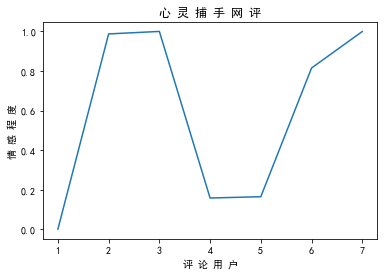

In [27]:
from snownlp import SnowNLP
import pandas as pd
import pylab as pl
txt = open('sentiment.txt', encoding='utf8')
text = txt.readlines()
txt.close()
print('读入成功')
sentences = []
senti_score = []
for i in text:
    a1 = SnowNLP(i)
    a2 = a1.sentiments
    sentences.append(i)  # 语序...
    senti_score.append(a2)
    print('doing')
table = pd.DataFrame(sentences, senti_score)
# table.to_excel('F:/_analyse_Emotion.xlsx', sheet_name='Sheet1')
# ts = pd.Series(sentences, senti_score)
# ts = ts.cumsum()
# print(table)
x = [1, 2, 3, 4, 5, 6, 7]
pl.mpl.rcParams['font.sans-serif'] = ['SimHei']
pl.plot(x, senti_score)
pl.title(u'心 灵 捕 手 网 评')
pl.xlabel(u'评 论 用 户')
pl.ylabel(u'情 感 程 度')
pl.show()